#  셀 합치기
- shift + M
- 파란색 박스일 때 합치기 가능

#  셀 나누기
- shift + ctrl + -(BACKSPACE  옆옆)
- 연두색 박스일 때 합치기 가능

In [22]:
1

1

In [23]:
2

2

In [24]:
3

3

In [1]:
from sklearn.datasets import load_iris # 데이터 셋 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # KNN모델 가져오기
from sklearn.model_selection import train_test_split # 훈련과 테스트셋 나누기
import warnings # 경고창 없애기

In [2]:
warnings.filterwarnings('ignore') # 경고창을 무시하는 함수

#  1. 문제정의
- 붓꽃 데이터를 사용해서 3가지 품종을 분류해 보자

#  2. 데이터 수집

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#  3. 데이터 전처리

In [8]:
#데이터 프레임 형태로 만들기
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
print(display(iris_df))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


None


# 4. 탐색적 데이터 분석
# 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [35]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [13]:
# 하이퍼 파라미터 튜닝

#  6. 학습

In [14]:
# 문제
X = iris_df
y = iris['target']

In [15]:
# train, test
# 75 : 25의 비율로 데이터를 나눔
# 데이터를 섞을 수 있다 random_state = 숫자(이 기능이 이미 들어가 있어 실행시마다 자동 데이터가 섞임)
# train과 test의 비율을 조정할 수 있다 test_size = 0 ~ 1(값에 따라 테스트의 퍼센트가 달라짐)
## train의 비율을 높일 때 : 학습하고 싶은 데이터를 늘릴 때
## test의 비율을 높일 때 : 예측 값에 대한 신뢰도를 높이고 싶을 때
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
# 학습하기
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#  7. 평가

In [19]:
# 0 setosa
# 1 virgicolor
# 2 viginicar
# 학습 과정이 선행이 되어야 함
# 예측을 하는 함수
# 모델이 정한 규칙을 통해 예측
# fit(학습) 단계를 통해서 모델은 스스로 규칙을 찾음
knn.predict([[1,10,6,4]])
# predict는 예측하는 함수이기 때문에
# 답이 없는 문제를 넣어줘야함

array([2])

In [37]:
# X_test로는 예측결과를 저장
# Y_test로는 저장된 결과와 비교를 해서 정확도를 출력
knn.score(X_test, y_test)

1.0

In [24]:
for i in range (1,350):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    result = knn.score(X_test, y_test)
    print('{}번 {}'.format(i, result))

1번 1.0
2번 0.9736842105263158
3번 1.0
4번 1.0
5번 1.0
6번 1.0
7번 1.0
8번 0.9736842105263158
9번 0.9736842105263158
10번 0.9736842105263158
11번 0.9736842105263158
12번 0.9736842105263158
13번 1.0
14번 0.9736842105263158
15번 1.0
16번 0.9736842105263158
17번 0.9736842105263158
18번 0.9736842105263158
19번 1.0
20번 1.0
21번 1.0
22번 0.9736842105263158
23번 0.9736842105263158
24번 0.9736842105263158
25번 0.9736842105263158
26번 0.9736842105263158
27번 0.9736842105263158
28번 0.9736842105263158
29번 0.9736842105263158
30번 0.9736842105263158
31번 0.9736842105263158
32번 0.9736842105263158
33번 0.9736842105263158
34번 0.9736842105263158
35번 0.9736842105263158
36번 0.9736842105263158
37번 0.9736842105263158
38번 0.9736842105263158
39번 0.9736842105263158
40번 0.9736842105263158
41번 0.9736842105263158
42번 0.9736842105263158
43번 0.9736842105263158
44번 0.9736842105263158
45번 0.9736842105263158
46번 0.9736842105263158
47번 0.9736842105263158
48번 0.9736842105263158
49번 1.0
50번 0.9736842105263158
51번 1.0
52번 1.0
53번 1.0
54번 1.0
55번 1.0

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 112, n_neighbors = 113

#  하이퍼 파라미터 튜닝 / 학습 / 평가

In [38]:
test_list = []
train_list = []

for k in range(1, 105, 2):
    m = KNeighborsClassifier(n_neighbors = k)
    m.fit(X_train, y_train)
    
    test_score = m.score(X_test, y_test)
    test_list.append(test_score)
    
    train_score = m.score(X_train, y_train)
    train_list.append(train_score)

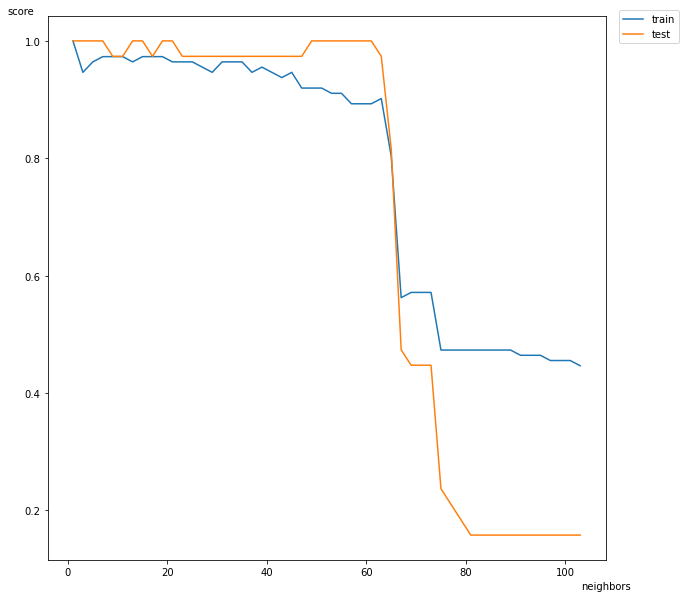

In [39]:
plt.figure(figsize = (10,10))
plt.plot(range(1, 105, 2), train_list, label = 'train')
plt.plot(range(1, 105, 2), test_list, label = 'test')
plt.xlabel('neighbors', position = (1,1))
plt.ylabel('score', rotation = 0, position = (1,1))
plt.legend(loc = "upper right", bbox_to_anchor = (1.14,1.02))
plt.show()